## Este algoritmo entrena un modelo con Epitopes de Influenza (tomando como dataset positivo Epitopes desde https://www.iedb.org/, y los epitopes negativos fueron tomados desde las proteínas involucradas y generados por un algoritmo creado por Protech.

      NumTiny  NumSmall  NumAliphatic  NumAromatic  NumNonPolar  NumPolar  \
0           2         4             2            3            6         2   
1           4         6             0            0            3         5   
2           3         4             2            1            4         4   
3           3         6             4            0            6         3   
4           3         4             4            2            8         1   
...       ...       ...           ...          ...          ...       ...   
4563        3         7             4            2            7         7   
4564        4         7             5            1           10         4   
4565        3        10             6            0            8         6   
4566        1         3             4            2            8         6   
4567        6        10             3            1            8         6   

      NumCharged  NumBasic  NumAcidic  PorcTiny  ...        z3        z4  \

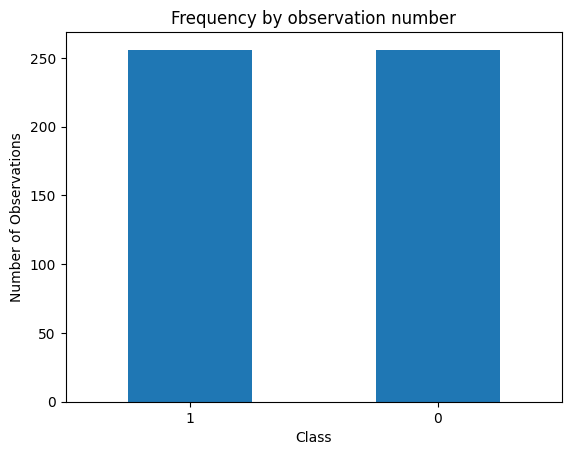

In [93]:
#MODULOS NECESARIOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from joblib import dump, load
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#ALGORITMO CLASIFICADOR
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True),]  
              

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)
#fc3=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
#     'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi',
#     'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2',
#     't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 'pKC',
#     'AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
#feature_coll =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']

cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiAlgorithm.csv', sep=',',usecols=cols)
print(df_ref)
X=df_ref[feature_cols]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
print(df_ref.iloc[np.random.random_integers(256,4312,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
print(Xrandom)
Yrandom=df4.Class
print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)
count_classes = Yrandom.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

RF,GaussianNB,DT,XGB,SVC
acc
[0.7177669902912619, 0.635242718446602, 0.6055339805825242, 0.599611650485437, 0.510873786407767] [0.048217447421420964, 0.04630274096944821, 0.04873080442430394, 0.0452498015206333, 0.06779146635629124]
rec
[0.7180653214228863, 0.7137413371348776, 0.5372099940793944, 0.6255391202852413, 0.42637831868204684] [0.0750429813125466, 0.062291938765370716, 0.1103753283864319, 0.1091698455500387, 0.2662399135443492]
pre
[0.717851606374194, 0.6148417733288329, 0.633849307818914, 0.6001314089751102, 0.42891485528300977] [0.07636430363746964, 0.06219225601337915, 0.10229560402244761, 0.06554572501022193, 0.20762377009377275]
f1
[0.7138239127734722, 0.6581398338128178, 0.5694159691071468, 0.6066035244834125, 0.40776509415012624] [0.054489566825063195, 0.04756165693007399, 0.06740066365807863, 0.06733628292219135, 0.2206215999136586]
matt
[0.44037882440458437, 0.2770117566027098, 0.22441759097564365, 0.20303257277535183, 0.05068117430832372] [0.09556519677614866, 0.094

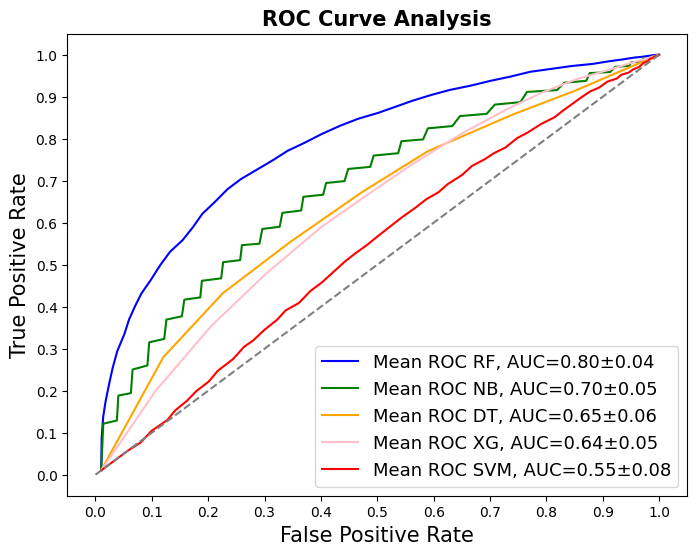

In [94]:
for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[feature_cols]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#"RF","NB","DT","XG","SVM"
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) #svc
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2])) #gNB
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4])) #d
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_0_Algorithm.png')
plt.show()


#dump(cls, 'model.joblib') 

RF,GaussianNB,DT,XGB,SVC
acc
[0.7057281553398057, 0.628640776699029, 0.5997087378640776, 0.5945631067961163, 0.5615533980582524] [0.042022015066058925, 0.04636621204882724, 0.045988170949522414, 0.050859703082904606, 0.0605489077756254]
rec
[0.6997675233757212, 0.7726344941613265, 0.5706396884223379, 0.6666168361429955, 0.525619683143658] [0.06840012996712956, 0.057856876763287955, 0.11712860325550205, 0.1067653948436577, 0.1990957643872523]
pre
[0.7105625798388444, 0.5993757306113251, 0.6115000021789996, 0.5858515020007128, 0.5367109632953232] [0.06596726030826267, 0.05577022421592484, 0.07139668717176735, 0.06690447297644676, 0.15878357231828538]
f1
[0.7017149965567969, 0.6731541598609165, 0.581585373087102, 0.6170452645759492, 0.5183202650250315] [0.04753305178881518, 0.04546450769670341, 0.07136141918050001, 0.06047023212006837, 0.16373996135903288]
matt
[0.41595177107425735, 0.2709043800262231, 0.20480736412278808, 0.20010349204413103, 0.14367885201492311] [0.08261770250319345, 0.

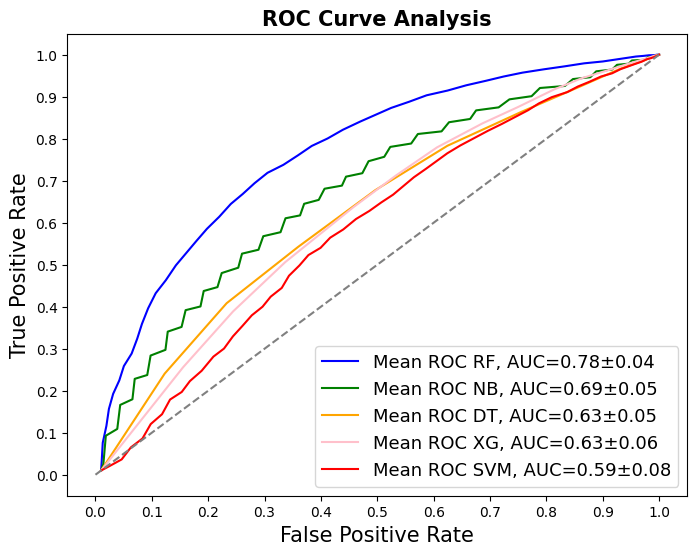

In [95]:
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
              

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)

#ANOVA 
fc1=['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged']

X=df_ref[fc1]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc1]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#"RF","NB","DT","XG","SVM",
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_1_anova_Algorithm.png')
plt.show()


#dump(cls, 'model.joblib') 

RF,GaussianNB,DT,XGB,SVC
acc
[0.755631067961165, 0.6545631067961163, 0.6423300970873785, 0.6280582524271844, 0.5570873786407767] [0.042186784210159124, 0.04718846121565332, 0.051018840121256355, 0.04797128543827087, 0.06695200819721628]
rec
[0.7320536961986616, 0.7127803168694871, 0.6376364307922102, 0.6800173273903574, 0.536254587009023] [0.0602993074247743, 0.07320984906707691, 0.1260785474638087, 0.1242518755927102, 0.18896587838832557]
pre
[0.7642287027916034, 0.6411813535141758, 0.651033451133557, 0.6260820124518554, 0.5334242695499796] [0.06602608754158691, 0.06472608943283115, 0.0779218120873502, 0.08445591560613813, 0.13485821544042922]
f1
[0.7448786162665846, 0.671604545232864, 0.6337408280995027, 0.6400921154571431, 0.5221664960153831] [0.04297524172757648, 0.04920306379127189, 0.07333204659664352, 0.06352400924772819, 0.14929814281009932]
matt
[0.5145473213968681, 0.3148981628723244, 0.2921443439207356, 0.2701278054476809, 0.1293957062534024] [0.08353177432645455, 0.09418295

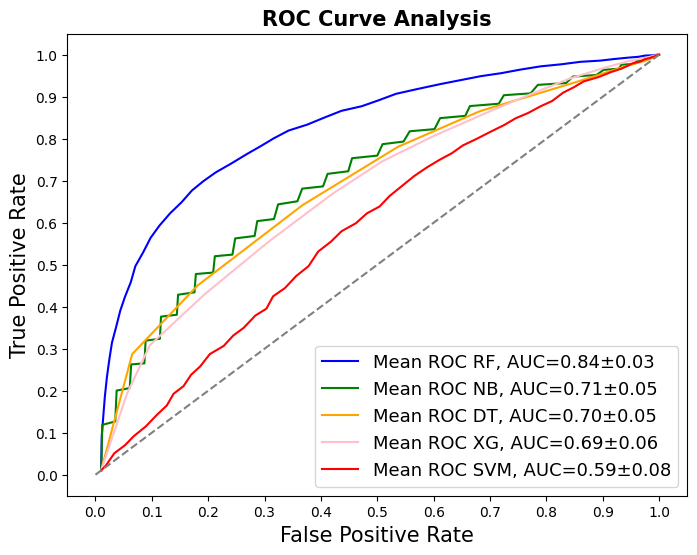

In [96]:
#mutualinfo
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
              

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)

#ANOVA 
fc2=['PorcAromatic', 'PorcAcidic', 'PorcAliphatic', 'z5', 'PartialSpecificVolume', 'PorcSmall', 'PorcBasic', 'SurroundingHidrophobicity', 'st7', 'pKC', 'PorcPolar', 'ExtendedStructurePreference', 'Blosum9', 'z1', 'ElectronicProperties', 'at_charge', 'PorcNonPolar', 'z3', 'at_boman', 'HelixBendPreference']

X=df_ref[fc2]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc2]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg, mean_tpr_xg, color='pink', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_2_mi_Algorithm.png')
plt.show()

In [97]:
##merge
fc_merge=['PartialSpecificVolume', 'st7', 'Blosum4', 'at_hmoment_sheet', 't2', 'at_hmoment_alpha', 'PorcAromatic', 't3', 
          'DoubleBendPreference', 'AlphaAndTurnPropensities', 'at_boman', 'HelixBendPreference', 'Blosum8', 'st3', 'MsWhim3', 'pKC', 
          'PorcAcidic', 'PorcSmall', 'MsWhim1', 'PorcCharged','PorcAliphatic', 'z5', 'PorcBasic', 'SurroundingHidrophobicity', 
          'PorcPolar', 'ExtendedStructurePreference', 'Blosum9', 'z1', 'ElectronicProperties', 'at_charge', 'PorcNonPolar', 'z3']
##32



RF,GaussianNB,DT,XGB,SVC
acc
[0.760776699029126, 0.6650485436893204, 0.6646601941747573, 0.6431067961165049, 0.5478640776699029] [0.042663689530719716, 0.050044753277125736, 0.054376213104694295, 0.04447237839806648, 0.06128444195636063]
rec
[0.7354570253132451, 0.7321488316858159, 0.6594050557810425, 0.6370363593133164, 0.5085315609670099] [0.06690495023607211, 0.05862146744621353, 0.10129030784472223, 0.10657309406249614, 0.20385381867071015]
pre
[0.7849244923886135, 0.643593734440442, 0.6628308018943285, 0.6539809403086005, 0.5169816325554777] [0.0655177872558535, 0.06337596215325478, 0.08017170901679245, 0.07486862336930927, 0.16717398873181347]
f1
[0.7562759552381699, 0.6829972575863742, 0.6548880732573872, 0.6365125244737599, 0.4980924341480091] [0.04630910469633815, 0.049135477485828534, 0.06621973013512511, 0.0569224218086352, 0.17015947079494112]
matt
[0.5268186934463609, 0.3352796683488388, 0.3333426013972133, 0.29327742319614714, 0.1209173526142587] [0.08342960546412674, 0.0

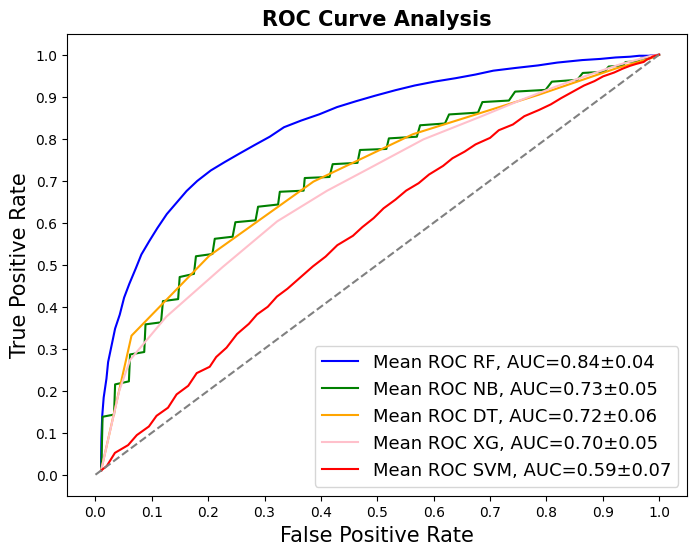

In [98]:
#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)


X=df_ref[fc_merge]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4312,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc_merge]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()


tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) 
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2])) 
plt.plot(mean_fpr_xg, mean_tpr_xg, color='pink', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3])) 
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_3_mix_Algorithm.png')
plt.show()

RandomForestClassifier(random_state=123, warm_start=True)
[0.8852427184466017] [0.03253166123853831]
[0.9471843615667233] [0.02673741326188185]
[0.8444299212845796] [0.04682719724419453]


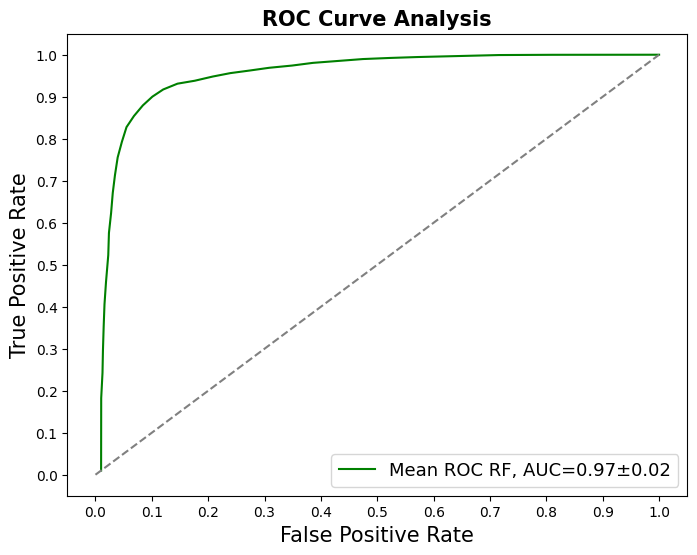

In [27]:
#
# ALGORITMO 2 PARA CUANDO YA ESTÁ CARGADO EL MODELO model.joblib
from sklearn.ensemble import RandomForestClassifier
#from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##CARGAR MODELO GUARDADO ANTERIORMENTE

result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]

W_range = range(0, 100)

fc3=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
     'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi',
     'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2',
     't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 'pKC',
     'AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']
cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiRef.csv', sep=',',usecols=cols)
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        fpr_all=[]
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc3]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        X_prueba=X_test
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_rf=result_table['fpr'][0:99]
tpr_rf=result_table['tpr'][0:99]
fpr_rf =fpr_rf.to_list()
tpr_rf =tpr_rf.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0

for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

###########
plt.figure(figsize=(8,6))
clasif = ["RF"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
#plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
#plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
#plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_Model.png')
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier
import random
# Supongamos que tienes un modelo ya entrenado (modelo_rf)
# modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# modelo_rf.fit(X_entrenamiento, y_entrenamiento)

# Ahora, tienes nuevos datos de prueba (X_prueba)
# X_prueba = ...

# Realiza predicciones en los nuevos datos
print(X_prueba)
predicciones = cls.predict(X_prueba)


[[ 3.29936164e-03  5.51404353e-03  2.16728599e-03 ... -1.03084595e-02
   3.25907667e-02  2.93316901e-01]
 [ 3.51498763e-03  4.51034304e-03  1.74379891e-03 ... -1.09798501e-02
   2.53456610e-01  2.02769850e-01]
 [ 4.21017955e-03  3.82368967e-03  2.47386403e-03 ...  2.65571969e-03
   2.50835390e-01  2.19480966e-01]
 ...
 [ 5.23624714e-03  6.58139668e-03  2.28853724e-03 ...  2.87740062e-04
   1.67290734e-01  2.00748881e-01]
 [ 3.13691499e-03  4.90636716e-03  2.31950444e-03 ...  5.61299992e-03
   3.34704156e-01  2.67759175e-01]
 [ 4.44965807e-03  2.64776491e-03  1.52946900e-03 ...  1.72215800e-03
   3.61291889e-01  2.00717716e-01]]


In [ ]:
# Si tienes etiquetas reales para comparar, compara las predicciones con las etiquetas reales
y_prueba_real = random.sample([0]*30 + [1]*73, 103)
print(y_prueba_real)

exactitud = metrics.accuracy_score(y_prueba_real, predicciones)

# Imprime la exactitud u otra métrica de interés
print(f'Exactitud del modelo en los nuevos datos de prueba: {exactitud}')
